In [ ]:
#%%html
#<link rel="stylesheet" href="static/hyrule.css" type="text/css">

# Introduction to Support Vector Machines

## Objectives

- Linear Algebra Review
- Get familiar with the theory behind Support Vector Machines
- Learn how to Optimize with our 'C' variable
- Work with Kernels  & more optimizations

### Definitions:

term / variable | definition
--------|----------
Vector | a quantity having direction and magnitude
Hyperplane |  a subspace of one dimension less than the ambient space, which allows us to split our space.
Kernel | function that enables us to transform our euclidean geometry in some way.  (Think similiarity function ~ dot products between vectors). 
$$b$$| intercept (hyperplane translation from origin)
$$\vec{w}$$ | normal vector (determines hyperplane orientation)
$$\vec{x_i}$$ | sample vector
$$\alpha_i$$ | Lagrangian weight
$$C $$|  Regularization Term ( Allows us to vary our number of support vectors, ie margin of our 'street') (default = 1)
$$epsilon$$ | our slack variable
$$kernel$$ |  scikit learn parameter. Specify kernel of choice : 'linear','rbf','poly' (default is rbf)
$$order$$ | degree of polynomial kernel function (default is 3)
$$gamma$$ | Kernel gaussian coefficient for 'rbf' kernel (default is 0) 

reference : http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

##Class Notes



## How would we split this dataset?  

Figure 1 
<img src='img/iris_split1.png'/>


## And How would we split THIS dataset? 

Figure 2 

<img src='img/iris_split2.png'/>

It is not obvious how to divide the above data set into two distinct classes.
  
We will learn how. 

But first let's start with Linear Algebra review. 


### Basic operations on vectors in R^n


In order to visualize the separation of our data (above) : we have restricted our data to two features.  Let's look at our two classes data points from distinct classes: 

Figure 3 \

<img src='img/Iris_split3.png'/>


These data points are vectors.  (Note: if we were using all 4 features of the data, each vector would be represented as a 4 x 1 matrix (in lieu of 2 x 1))


u = $\begin{bmatrix}5\\3\end{bmatrix}$

v = $\begin{bmatrix}5.4\\3\end{bmatrix}$


### Multiplication by a scalar:
When we multiply a vector by a scalar, we are 'stretching' it (if scalar is pos. and 'shrinking' the vector if the scalar is neg.)

c= 2
cu =  ? 


### Vectors Inner Products 

Now let's find the dot product of u & v:

u.v = $\begin{bmatrix}5\\3\end{bmatrix}^\top$ $\begin{bmatrix}5.4\\3\end{bmatrix}$= $\begin{bmatrix}5, 3\end{bmatrix}$ $\begin{bmatrix}5.4\\3\end{bmatrix}$

$u_1v_1 + u_2v_2$ =  ?

### Dot Product Visualization

We can visualize the dot product by taking v and orthogonally projecting onto u


<img src='img/projection.png'/>


### Norms: 
<img src='img/norm.png'/>

Another property that we should be familiar with is the norm.
Norm = Euclidean Length (or Hypotheneuse) as shown above.

Norm : $${\|u\|}= \sqrt{((5)^2 + (3)^2)}$$

### Vector Addition / Subtraction

u + v = ? 

### Theory Behind SVM

Again lets consider our Iris Example.  In order to make the math work for us, we will consider one class to have a target value of (+1) and the other to have a value of (-1). 

- We know we need to draw a line (or hyperplane) to split these classes, but which line do we choose?   A line could have any orientation (w) and any displacement from origin (b).  We will find out how to develop the equation for the optimal Hyperplane Line.  

- We want to add a line (while keeping in mind) that we would like to add the widest 'street' (margin) possible.  We will also learn how to optimize our model by adjusting the width of our margin.


####EQN #1) Our Decision Rule:

Imagine we have a normal vector w (perpendicular to the margin) and some unknown vector x:
In order to get a sense of which category (side of the street) our unknown vector is: we find the dot product of w and x ( if large enough, the unknown will be on the 'pos' side of street).

$$\vec{w}\cdot\vec{x} == ? $$ 

$$\vec{w}\cdot\vec{x} +b \geq 0$$   
Then: positive sample


#### EQN #2) For our x's in the margins of our 'street':

$${y}_{i}(\vec{w}\cdot\vec{x_+}+b)>=1$$ 
$${y}_{i}(\vec{w}\cdot\vec{x_-}+b)<= -1$$ 

** (and for all x in in the margin of our street:)
$${y}_{i}(\vec{w}\cdot\vec{x}+b)-1= 0$$ 

**  Here we want to note: that 1 is arbritrary (mathematically convenient) 
  
- Remember we are trying to develop a street as wide as possible (We will see later this, is an optimiz..)

- We can find the differences of two vectors: (but this isn't our width).


#### EQN #3)  Finding the width of our street:
 $$width =({x}_{+}-{x}_{-})\cdot{{\vec{w}\above 1pt\|w\|}}$$

 $$ unit vector =  {{\vec{w}\above 1pt\|w\|}}$$

#### EQN #4)  Manipulating equations 2 & 3 we have:


$${x}_{+}{{\vec{w}\above 1pt\|w\|}}-{x}_{-}{{\vec{w}\above 1pt\|w\|}}==$$

$${{(1-b\above 1pt\|w\|}}  - {{(-1-b)\above 1pt\|w\|}}$$

We need to maximize the following in order to get our widest street: 

 $$MAX  {{2\above 1pt\|w\|}}$$

We see that the width is inversely proportional to the length of the normal vector
  
##### EQN #5)  Lagrange Multipliers:
If we want to find the maximum of a function (that has restraints), then we need to use a technique called: Lagrange Multipliers. 
Regarranging equation 4 and inserting our Lagrange Mulipliers (alpha) we have:

  $$ L=  1/2{{\|w\|}^2} - \sum \alpha_i[(y_i(\vec{w}\cdot{x_i} +b)-1] $$
  
  
####EQNs #6)   And how do we find maxima ?   Take the derivative 
- taking partial derivative of above (with respect to w), we find that :

  $$\vec{w} = \sum \alpha_i(y_i{x_i})$$
  
- And now we see that vector w is just a linear sum of our samples!

- And taking partial derivative of above (with respect to b) we have:

  $$ \sum \alpha_i(y_i)=0$$
  
- We discover that our optimization only depends on (what? )
 
  $$ L= \sum \alpha_i -1/2\sum\sum\alpha_i\alpha_j(y_iy_j)(x_i\cdot{x_j})$$
  
  
- The Dot product of pairs of samples!
 
####EQNs #7)   Our final Hyperplane Equation

-  And now we see that our Decision Rule depends only on our sample vectors and u (the unknown vector) 
 
  $$ \sum\alpha_iy_i(x_i\cdot\vec{u}) + b \geq\ 0$$
  
 Again, our solutions have total dependence on the Dot Products.
 
 It still doesn't seem possible that we can find a solution for the dataset above, using just the above equations .. right ?   

Let's try a trivial example:

### Trivial Example:

- Lets take our 2 points from Figure 3.  These points are our support vectors
- We would like to discover a simple SVM that accurately discriminates between 
our two classes.

 $ x_1= \begin{bmatrix}5.4\\3\end{bmatrix}$  (positive sample)

 $ x_2 =\begin{bmatrix}5\\3\end{bmatrix}$    (negative sample)

In order to account for our bias input, we can adjust our vectors as follows:
    
 $ {x_1}= \begin{bmatrix}5.4\\3\\1\end{bmatrix}$
 
 $ x_2 =\begin{bmatrix}5\\3\\1\end{bmatrix}$
 
 Using the structure we developed in our final EQN 7, we have:
 
  $$\alpha_1(x_1\cdot(x_1)) + \alpha_2(x_1\cdot(x_2)) = +1 $$
  $$\alpha_1(x_1\cdot(x_2)) + \alpha_2(x_2\cdot(x_2)) = -1 $$
  
  $$ (39.16)\alpha_1 + (37)\alpha_2 = +1 $$
  $$ (37)\alpha_1 + (35)\alpha_2 = - 1 $$
  
  A little algebra will give us a solution to the system of equations:
  
  $$\alpha_1= 2.18$$
  $$\alpha_2 =-1.25$$
  
  
  Using EQN 6), we can find our hyperplane 
  
  
   $$\vec{w} = \sum \alpha_i({x_i})$$
   
   =$$2.18\begin{bmatrix}5.4\\3\\1\end{bmatrix}  - 1.25\begin{bmatrix}5\\3\\1\end{bmatrix} =$$
   
   $$\begin{bmatrix}5.522\\2.79\\.93 \end{bmatrix}$$
   
   Alas, the above vector describes our separating hyperplane equation ( (with the last value as our bias)
   
   y = wx + b , where w = $$\begin{bmatrix}5.522\\2.79\end{bmatrix}$$
   and b = 0.93
   
   
   Finally: we can visualize our Hyperplane!
   
   <img src='img/iris_split4.png'/>

### Thinking out loud: 

-  Which parameters determine our hyperplane ?

-  What Support Vectors did we use ?

-  What are the advantages of using few support vectors vs. many?

-  Which hyperparameter will allow us to adjust our number of support vectors?

-  How do you feel SVMs might behave in regards to outliers ? 


In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from sklearn import datasets, svm
import seaborn as sns

In [3]:
# In order gain more intuition about how we are splitting our grid: we'll build the plot_estimator 

def plot_estimator(estimator,X,y):
    estimator.fit(X,y)
    # ? 
    x_min, x_max =X[:,0].min() -1, X[:,0].max() +.1
    y_min, y_max =X[:,1].min() -1, X[:,1].max() +.1
    xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # perform classification on our samples
    Z= estimator.predict(np.c_[xx.ravel(), yy.ravel()])
                        
    # Put the result into a color plot
    Z=Z.reshape (xx.shape)
    plt.figure(figsize=(12,12))
    plt.pcolormesh(xx,yy, Z, cmap=plt.cm.Paired)
                        
    # Lets plot our sample points
    plt.scatter(X[:,0], X[:,1], c=y)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


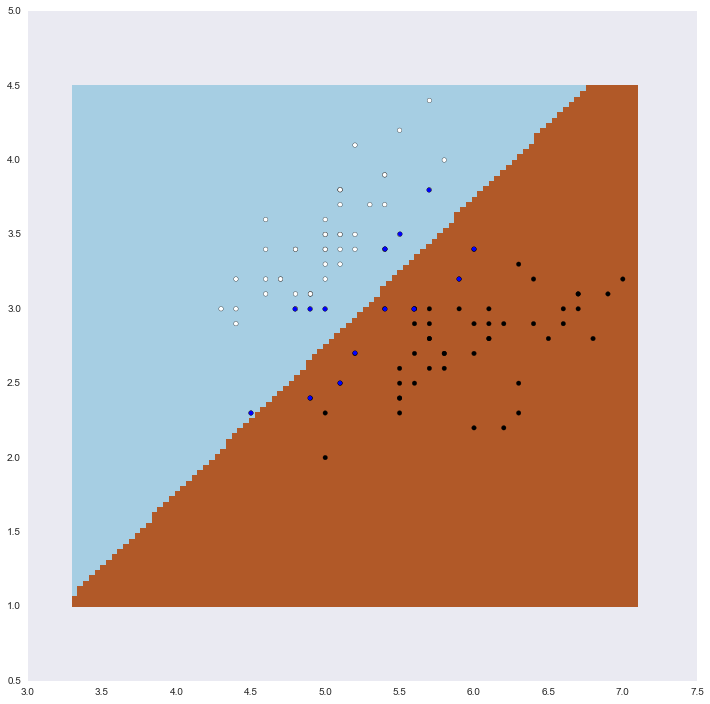

In [4]:
# Visualizing our Support Vectors and C (bias)

# Note that svm.LinearSVC uses the one vs. all methodology 
# where SVC implements one vs one 

iris=datasets.load_iris()
X=iris.data
y=iris.target

X=X[y !=2,:2] 
y = iris.target[y!=2]

svc = svm.SVC(kernel='linear', C=1).fit(X, y)
#svc = svm.LinearSVC(C=1).fit(X, y)
plot_estimator(svc,X,y)
# and then plot actually data points
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

### C ~ is a Regularization Parameter:
- small C allows constraints to be easily ignored (large margin)
- large C makes contraints difficult to ignore (narrow margin)

### In Class: 

- Build a new model similiar to above, but with only classes 1 & 2 (in lieu of classes 0 and 1). 

- Keep your kernel 'linear', but adjust your C, what do you see?



### Inseparable Data

When no hyperplane can perfectly separate our data, what can we do?
- We can allow some training examples to be misclassified
- We can allow some examples to fall within the margin region

Recall: for the separable case we have a decision rule of:
$${y}_{i}(\vec{w}\cdot\vec{x_+}+b)>=1$$ 


However, for the inseparable case, we 'relax' our constraints such that:
$${y}_{i}(\vec{w}\cdot\vec{x_+}+b)>=1 - \epsilon_n$$

$$  \epsilon_n  =  slack variable $$

And what we are trying to minimize becomes:

$$1/2{{\|w\|}^2} + C\sum\epsilon_n$$


- What happens when C is large ?   and small?







<img src='img/Slack.png'/>|


What we see is that we now have (3) types of support vectors:

- Those lying on the margins
- Those in the margin  ( 0 < epsilon < 1)
- Those lying on the wrong side of the margin (epsilon >= 1)

We can see that our optimization is a balance of number of support vectors and C.

- How can we relate this back to our knowlege of regularization from Lesson 08?

## What Else can we do ?   The Kernel Trick.


If we are stuck in a space that is not linearly separable: simply switch to a new space.

What we need is a transformation (i.e. a Kernel!)

Remember we said that our maximization only depends on dot products?
Luckily, a kernel method is an algorithm that depends on data only through dot products.
Our dot products can be replaced by a kernel function which computes a dot product in some (potentially) higher dimensional feature space.

This allows us to generate a non-linear decision boundary (using methods that are designed for a linear class).   Further, this allows us to apply a classifier to data that would normally have no obvious dividing plane.

Let's see what this actually looks like.. 

Percentage of '0' labels: 0.5
Percentage of '1' labels: 0.5
Projecting dataset to R^3


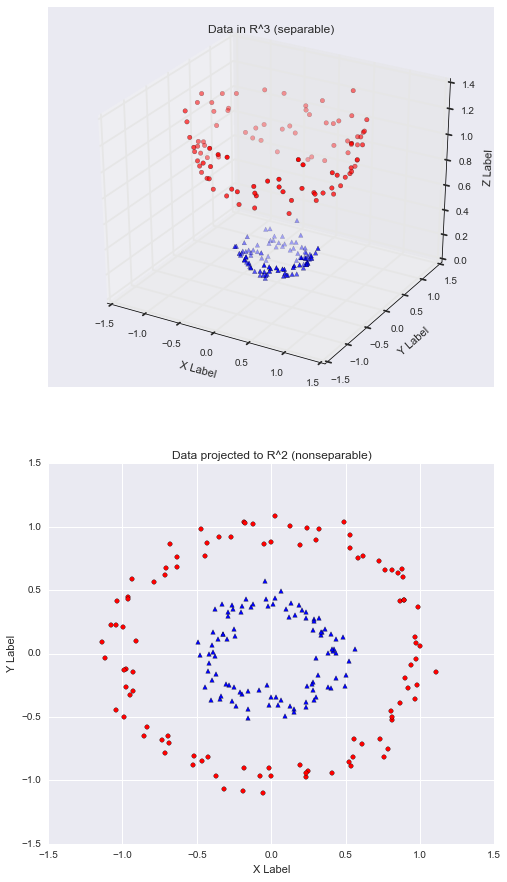

In [5]:
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles


def fn_kernel(x1, x2):
    """ Implements a kernel phi(x1,y1) = [x1, y1, x1^2 + y1^2] """
    return np.array([x1, x2, x1**2.0 + x2**2.0])

""" Generate linearly nonseparable dataset (in R^2) """
    
n = 200


# make_circles: a simple binary dataset that allows to visualize clustering and clasification

X, Y = make_circles(n_samples=n, noise=0.07, factor=0.4)

A=X[Y==0]
B=X[Y==1]

# where X,Ys are in regards to our cartesian coordinate 
X0_orig=A[:,0]
Y0_orig=A[:,1]

X1_orig=B[:,0]
Y1_orig=B[:,1]

frac0=len(A)/float(len(Y))
frac1=len(B)/float(len(Y))

print "Percentage of '0' labels:", frac0
print "Percentage of '1' labels:", frac1


# What does zip function do?
# Returns a list of tuples, where each tuple contains the ith element.. 

C= np.array([fn_kernel(x,y) for x,y in zip((X0_orig),(Y0_orig))])
X0=C[:,0]
Y0=C[:,1]
Z0=C[:,2]

D= np.array([fn_kernel(x,y) for x,y in zip((X1_orig),(Y1_orig))])
X1=D[:,0]
Y1=D[:,1]
Z1=D[:,2]

def plot_projection():    
    fig = plt.figure(figsize=(8,15))
    ax = fig.add_subplot(211, projection='3d')

    ax.scatter(X0, Y0, Z0, c='r', marker='o')
    ax.scatter(X1, Y1, Z1, c='b', marker='^')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title("Data in R^3 (separable)")

    # Project data to X/Y plane
    ax2d = fig.add_subplot(212)
    ax2d.scatter(X0, Y0, c='r', marker='o')
    ax2d.scatter(X1, Y1, c='b', marker='^')

    ax2d.set_xlabel('X Label')
    ax2d.set_ylabel('Y Label')
    ax2d.set_title("Data projected to R^2 (nonseparable)")

    plt.show()
    
def main():
    
    print 'Projecting dataset to R^3'
    plot_projection()
    
if __name__ == '__main__':
    main()

### Different Types of Kernels

- scikit-learn provides us with several types of Kernels to work with:

1) 'linear' : Linear decision boundary
    
    
- Good to use when: there is a clear separation of data or  # of features is large, and # of samples are  relatively small (can prevent overfitting)
        
    
2) 'poly' : Polynomial decicion boundary (adjust the order via 'order' argument)
    
-  The implict feature space of a polynomial kernel is equivalent to that of a polynomial regression                  (except that we do not have to worry about the combinatorial blow-up thanks due to the sparse design of the support vectors)
    
3) 'rbf': Radial Basis Function decision boundary ( inserts Gaussian kernel at each support vector, we can adjust the Gaussian kernel via the Gamma Feature)
    
    
- Good to use when # of samples is large and features relatively small 

### On Your Own
    
- Given the (3) of types of kernels above, and our previous model above, build & plot 3 new models.  Which do you think is ideal for our data ? 

- Experiment with each of the different features in the models ( adjust order (for poly) and adjust gamma for (rbf) as well as the C parameter.   

###  On Your Own:  

Using either the Iris data set or the following 'Adults' data set:

https://archive.ics.uci.edu/ml/datasets/Adult

- Split the data using using test train split (import helper module train_and_measure)
- Create a dict. 
- Using a 'for' loop with each of the kernel types and params determine the best model using grid.best_score, grid.best_params 
- How do you score? 

- Challenge: plot your optimizations (parameters vs score)

- Refer to scikit grid_score for guidance: 
http://scikit-learn.org/stable/auto_examples/grid_search_digits.html#example-grid-search-digits-py

In [ ]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# develop your "tuned parameters"
tuned_parameter = ? 
svc=SVC(kernel='linear')
grid=GridSearchCV(svc,param_grid= tuned_parameters)
grid.fit(X,y)



References:
    
    - SVMs :
    http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf
    
    - More on Scikit Learn Scaling: 
    http://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html
    
    - More on Slack variable and Loss function : 
    http://www.cs.utah.edu/~piyush/teaching/13-9-print.pdf

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
X, y = iris.data, iris.target

In [10]:
X.shape, y.shape

((150, 4), (150,))

In [24]:
X_test = [[ 5.0,  3.6,  1.3,  0.25]]

In [12]:
from sklearn.svm import LinearSVC
model = LinearSVC()

In [18]:
fit_model = model.fit(X, y)

In [22]:
print 'coefficients', fit_model.coef_
print 'intercepts', fit_model.intercept_

coefficients [[ 0.18424158  0.45122681 -0.80794401 -0.45070911]
 [ 0.05250727 -0.89274683  0.40462362 -0.93804961]
 [-0.85072434 -0.98669066  1.38104836  1.86538558]]
intercepts [ 0.10956154  1.6660596  -1.70950215]


In [25]:
fit_model.predict(X_test)

array([0])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf2 = LogisticRegression().fit(X, y)

In [30]:
clf2.predict(X_test)

array([0])

In [32]:
from sklearn.neighbors import NeighborsClassifier
model = NeighborsClassifier().fit(X,y)

ImportError: cannot import name NeighborsClassifier